<a href="https://colab.research.google.com/github/NoelleI/AI-Experiments-Pigmentation/blob/master/redness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [200]:
!git clone https://github.com/NoelleI/Pigmentation.git

fatal: destination path 'Pigmentation' already exists and is not an empty directory.


In [0]:
import numpy as np
from scipy import ndimage, misc
import re
import os
from datetime import datetime
import matplotlib.pyplot as plt
import skimage


pigs = []
filenames_dict = {}
str = "./Pigmentation/Pigmentation_photos/Experiment 2/Spot 1"    #photo directory on cloned repository for experimental pigmentation data


for root, dirnames, filenames in os.walk(str): 
    #print(filenames)
    for filename in filenames:
           # print(filename, "\n")
      #if re.search('d*[^{r|f}].jpg', filename):
            n =  re.match("(.*)(2019)(\d*_\d*)_(.*)", filename)
            if n:
              key = n.group(3)

              key = datetime.strptime(key, '%m%d_%H%M%S')
           # print(key, " ")
           # print(filename, "\n")
            #print(os.path.join(root, filename), "\n")
              filenames_dict.update({key: os.path.join(root, filename)})
            #print(filenames_dict, "\n\n")
#print(filenames_dict.keys(),"\n")
for key in sorted(filenames_dict.keys()):
  #print(key,filenames_dict[key], "\n")
  image = plt.imread(filenames_dict[key])
  #image = skimage.transform.resize(image, (192,256,3))  
  
  pigs+= [image]
  
  
pigs = np.asarray(pigs)

In [202]:
filenames

['1_F_43_XX_25_20190228_214705_FA101129_0100_SPOTS_57_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR57.jpg',
 '1_F_43_XX_25_20190226_224523_FA101129_0100_SPOTS_24_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR24.jpg',
 '1_F_43_XX_25_20190223_170715_FA101129_0100_SPOTS_XX_SPOTS#01_S_UnitedStates_CND_XX.jpg',
 '1_F_43_XX_25_20190225_100933_FA101129_0100_SPOTS_71_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR71.jpg',
 '1_F_43_XX_25_20190306_230513_FA101129_0100_SPOTS_64_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR64.jpg',
 '1_F_43_XX_25_20190310_203414_FA101129_0100_SPOTS_60_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR60.jpg',
 '1_F_43_XX_25_20190227_212058_FA101129_0100_SPOTS_51_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR51.jpg',
 '1_F_43_XX_25_20190301_083613_FA101129_0100_SPOTS_81_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR81.jpg',
 '1_F_43_XX_25_20190228_083804_FA101129_0100_SPOTS_74_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR74.jpg',
 '1_F_43_XX_25_20190310_104002_FA101129_0100_SPOTS_86_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR

In [203]:
len(pigs)

18

In [204]:
pigs.shape

(18, 480, 640, 3)

In [0]:



import pandas as pd
from scipy import stats
#del str
def measure_score(pigs): 
  
    score = []

    i = 0
    

    for pig in pigs:
        print(i, "\n")
        g = pig[:,:,1].reshape(-1)  #- 3*imagen[:,:,1].reshape(-1)/8
        b = pig[:,:,2].reshape(-1)
            

        if i > 0:

          mg = np.min(g)               ###may need to scroll over earlier days ###
          ag = np.mean(g)
          sg = stats.skew(g)

          mg_last = np.min(g_last)
          ag_last = np.mean(g_last)
          sgl = stats.skew(g_last)
 
          mb = np.min(b)
          ab = np.mean(b)
          
          mb_last = np.min(b_last)
          ab_last = np.mean(b_last)

          delbaa = np.abs(ab-ab_last)
          delbma = np.abs(sg*mb - sgl*mb_last)

          delgaa = np.abs(ag -ag_last)
          delgma = np.abs(sg*mg - sgl*mg_last)

          delba = ab-ab_last
          delbm = sg*mb - sgl*mb_last

          delga = ag -ag_last
          delgm = sg*mg - sgl*mg_last
          
          print("i =", i, "delavg", delbaa/delgaa)
          print("i = ", i, "delavm", delbma/delgma)

          if delbaa/delgaa >= ((1*10**3.25)/(1*10**3.1) + 0.8)/2:
            
            sca = 0
          else:
            sca = delga

          if delbma/delgma >= 0.8: ##(1*10**3.25)/(1*10**3.1):
           
            scm = 0
          else:
            scm = delgm

          sc = (sca + scm)/2
          print(sca, scm, sc, "\n")

          #g_last = g
          #b_last = b
          




            
          

        else:
          sc = 0  
          
          g_last = g
          b_last = b
          
         
        score += [sc]
        
        i += 1
       
      
        
    
    green_score = np.array(score)
    
    return(green_score)
        

In [206]:

green_score =  measure_score(pigs)

0 

1 

i = 1 delavg 0.4052356453341036
i =  1 delavm 0.3382094208548524
-8.82895182291665 40.51090679566097 15.84097748637216 

2 

i = 2 delavg 1.412609260364378
i =  2 delavm 1.7905614315051086
0 0 0.0 

3 

i = 3 delavg 0.8853763434055365
i =  3 delavm 0.7793083766164464
11.316188151041672 -7.422135359307191 1.9470263958672405 

4 

i = 4 delavg 1.1786708857432728
i =  4 delavm 0.5207531282271135
0 9.53248812425332 4.76624406212666 

5 

i = 5 delavg 0.5017552661232947
i =  5 delavm 0.24486069001266436
5.009108072916689 -12.814787272602302 -3.9028395998428067 

6 

i = 6 delavg 1.3262806791754382
i =  6 delavm 0.3357137837562838
0 34.35796372729234 17.17898186364617 

7 

i = 7 delavg 0.14066063958481587
i =  7 delavm 0.28637937689704224
-7.050065104166663 13.564120514968494 3.2570277054009154 

8 

i = 8 delavg 0.6987012588790424
i =  8 delavm 0.4026001105981879
-24.841513671874992 59.12689822872508 17.142692278425045 

9 

i = 9 delavg 1.7860621104434968
i =  9 delavm 0.721789229

In [207]:
(1*10**3.25)/(1*10**3.1)

1.412537544622754

Text(0.5, 1.0, 'Experiment 2, Spot 1')

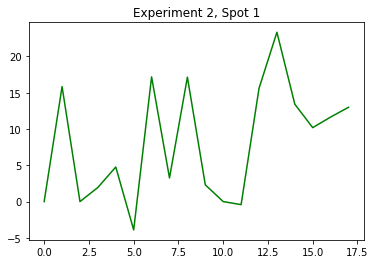

In [208]:

plt.plot(green_score, 'g-')


plt.title('Experiment 2, Spot 1')



In [0]:
#del str
pigs = []
filenames_dict_pigs = {}
str = "./Pigmentation/Pigmentation_photos/Experiment 1/Spot 4"    #photo directory on cloned repository for experimental pigmentation data


for root, dirnames, filenames in os.walk(str): 
    #print(filenames)
    for filename in filenames:   ####remember to update in order to avoid masks###
           # print(filename, "\n")
      #if re.search('d*[^{r|f}].jpg', filename):
            #n =  re.match("(.*)(2019)(\d*_\d*)_(.*)", filename)
            #key = n.group(3)

            #key = datetime.strptime(key, '%m%d_%H%M%S')
           # print(key, " ")
           # print(filename, "\n")
            #print(os.path.join(root, filename), "\n")
            #filenames_dict.update({key: os.path.join(root, filename)})
            #print(filenames_dict, "\n\n")
            n = re.match("(\d*)", filename)
            #print(n.group(), " ")
            #print(filename, "\n")
            #print(os.path.join(root, filename), "\n")
            filenames_dict_pigs.update({int(n.group()): [os.path.join(root, filename), filename]})
            #print(filenames_dict, "\n\n")
#print(filenames_dict.keys(),"\n")
for key in sorted(filenames_dict_pigs.keys()):
  #print(key,filenames_dict[key], "\n")
  image = plt.imread(filenames_dict_pigs[key][0])
  
  pigs+= [image]
  
  
pigs = np.asarray(pigs)

In [210]:
#del str
green_score = measure_score(pigs)


0 

1 

i = 1 delavg 2.444737
i =  1 delavm 1.0518796384488918
0 0 0.0 

2 

i = 2 delavg 1.4812952
i =  2 delavm 1.7552968867740235
0 0 0.0 

3 

i = 3 delavg 1.6442915
i =  3 delavm 7.417702141914257
0 0 0.0 

4 

i = 4 delavg 0.88656896
i =  4 delavm 0.7058202561648493
0.009486318 0.25487121330422013 0.13217876546940133 

5 

i = 5 delavg 0.9738218
i =  5 delavm 0.6942252465710993
-0.06380963 0.29722323110584226 0.11670679892541869 

6 

i = 6 delavg 0.83435714
i =  6 delavm 0.6596158902577837
0.009664178 0.23111123398164324 0.12038770593811776 

7 

i = 7 delavg 0.6375181
i =  7 delavm 3.9020794938448224
0.035803378 0 0.017901688814163208 

8 

i = 8 delavg 0.46304846
i =  8 delavm 0.7150583036667418
-0.019302547 0.24506846283564254 0.11288295792882286 

9 

i = 9 delavg 0.52370507
i =  9 delavm 0.8865323563968793
0.027959168 0 0.013979583978652954 

10 

i = 10 delavg 53.117065
i =  10 delavm 0.8104692544479852
0 0 0.0 

11 

i = 11 delavg 1.2187477
i =  11 delavm 0.60269622369828

Text(0.5, 1.0, 'Experiment 1, Spot 4')

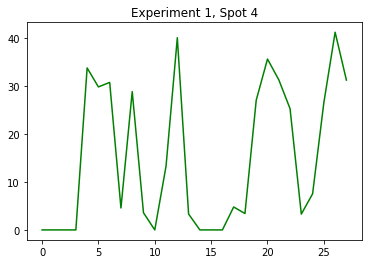

In [211]:

green_score = 255*green_score

plt.plot(green_score, 'g-')

plt.title('Experiment 1, Spot 4')

In [212]:
green_score

array([ 0.        ,  0.        ,  0.        ,  0.        , 33.70558519,
       29.76023373, 30.69886501,  4.56493065, 28.78515427,  3.56479391,
        0.        , 13.27154649, 39.99572698,  3.31298143,  0.        ,
        0.        ,  0.        ,  4.77232352,  3.41630548, 26.99824193,
       35.55605666, 31.25190571, 25.24095681,  3.28683883,  7.50936225,
       26.50713704, 41.13698044, 31.17670539])

In [213]:
import numpy as np
from scipy import ndimage, misc
import re
import os
from datetime import datetime
import matplotlib.pyplot as plt
import skimage
import cv2

#image = cv2.resize(pigs[0], (640,480))

#print(image.shape)
pigs = []
  ##set the first day of experiment 2 to the last day of experiment 1 
filenames_dict = {}
str = "./Pigmentation/Pigmentation_photos/Experiment 2/Spot 4"    #photo directory on cloned repository for experimental pigmentation data


for root, dirnames, filenames in os.walk(str): 
    #print(filenames)
    for filename in filenames:
           # print(filename, "\n")
      #if re.search('d*[^{r|f}].jpg', filename):
            n =  re.match("(.*)(2019)(\d*_\d*)_(.*)", filename)
            if n:
              key = n.group(3)

              key = datetime.strptime(key, '%m%d_%H%M%S')
           # print(key, " ")
           # print(filename, "\n")
            #print(os.path.join(root, filename), "\n")
              filenames_dict.update({key: os.path.join(root, filename)})
            #print(filenames_dict, "\n\n")
#print(filenames_dict.keys(),"\n")
for key in sorted(filenames_dict.keys()):
  #print(key,filenames_dict[key], "\n")
  image = plt.imread(filenames_dict[key])
  #image = skimage.transform.resize(image, (192,256,3))  
  print(image.shape)

  pigs+= [image]
  
  
pigs = np.asarray(pigs)
g0 = pigs[0][:,:,1].reshape(-1)  #- 3*imagen[:,:,1].reshape(-1)/8
b0 = pigs[0][:,:,2].reshape(-1)

(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)


In [214]:
pigs.shape

(18, 480, 640, 3)

In [215]:
#del str
green_score = measure_score(pigs)

0 

1 

i = 1 delavg 0.02630205704203132
i =  1 delavm 0.5088325453982125
15.283183593749982 -5.771294182909173 4.755944705420404 

2 

i = 2 delavg 0.1699502493941451
i =  2 delavm 0.567922376426864
23.35608072916665 -34.46330529502232 -5.553612282927837 

3 

i = 3 delavg 1.3313664765009465
i =  3 delavm 1.1953074409294564
0 0 0.0 

4 

i = 4 delavg 0.5183236634840549
i =  4 delavm 0.453562642743584
21.325257161458325 -64.08476946193433 -21.379756150238002 

5 

i = 5 delavg 0.7257662817049493
i =  5 delavm 0.8147092511036472
26.212529296874976 0 13.106264648437488 

6 

i = 6 delavg 0.5994320671999158
i =  6 delavm 1.326212824501703
26.99849934895832 0 13.49924967447916 

7 

i = 7 delavg 0.8408288645414411
i =  7 delavm 1.0263480131003204
27.660361328124992 0 13.830180664062496 

8 

i = 8 delavg 0.754546320902405
i =  8 delavm 0.596917650687449
32.79143880208332 -73.52814964066344 -20.36835541929006 

9 

i = 9 delavg 0.761680457206476
i =  9 delavm 0.9094674515300942
29.753264973

Text(0.5, 1.0, 'Experiment 2, Spot 4')

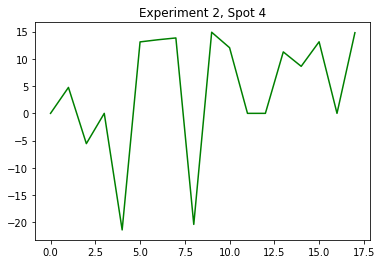

In [216]:


plt.plot(green_score, 'g-')

plt.title('Experiment 2, Spot 4')

In [217]:
green_score

array([  0.        ,   4.75594471,  -5.55361228,   0.        ,
       -21.37975615,  13.10626465,  13.49924967,  13.83018066,
       -20.36835542,  14.87663249,  12.04162109,   0.        ,
         0.        ,  11.27147949,   8.62448405,  13.12703776,
         0.        ,  14.79311198])

In [0]:
pigs = []
filenames_dict = {}
str = "./Pigmentation/Pigmentation_photos/Experiment 2/Spot 2"    #photo directory on cloned repository for experimental pigmentation data


for root, dirnames, filenames in os.walk(str): 
    #print(filenames)
    for filename in filenames:
           # print(filename, "\n")
      #if re.search('d*[^{r|f}].jpg', filename):
            n =  re.match("(.*)(2019)(\d*_\d*)_(.*)", filename)
            if n:
              key = n.group(3)

              key = datetime.strptime(key, '%m%d_%H%M%S')
           # print(key, " ")
           # print(filename, "\n")
            #print(os.path.join(root, filename), "\n")
              filenames_dict.update({key: os.path.join(root, filename)})
            #print(filenames_dict, "\n\n")
#print(filenames_dict.keys(),"\n")
for key in sorted(filenames_dict.keys()):
  #print(key,filenames_dict[key], "\n")
  image = plt.imread(filenames_dict[key])
  #image = skimage.transform.resize(image, (192,256,3))  
  
  pigs+= [image]
  
  
pigs = np.asarray(pigs)

In [219]:
green_score = measure_score(pigs, )

0 

1 

i = 1 delavg 0.7827061372092886
i =  1 delavm 0.7256314056541749
-8.216614583333325 36.714848202510254 14.249116809588465 

2 

i = 2 delavg 1.0652073960311683
i =  2 delavm 0.7441582371246475
-26.924807942708327 65.3684694139126 19.22183073560214 

3 

i = 3 delavg 0.783592689074783
i =  3 delavm 2.4030285747417426
17.75043945312501 0 8.875219726562506 

4 

i = 4 delavg 1.4276055726191377
i =  4 delavm 0.9082544283169917
0 0 0.0 

5 

i = 5 delavg 4.475916974161102
i =  5 delavm 0.9802779565931259
0 0 0.0 

6 

i = 6 delavg 1.636751383825052
i =  6 delavm 1.2118049564926223
0 0 0.0 

7 

i = 7 delavg 0.8449682745445848
i =  7 delavm 0.8094593386114107
-13.359244791666669 0 -6.679622395833334 

8 

i = 8 delavg 0.8934944626844662
i =  8 delavm 0.7795145506076764
-25.66923828124999 74.74286701903846 24.536814368894234 

9 

i = 9 delavg 2.558039773831718
i =  9 delavm 2.723874939899871
0 0 0.0 

10 

i = 10 delavg 2.097986538178648
i =  10 delavm 4.051846744839353
0 0 0.0 

11 

Text(0.5, 1.0, 'Experiment 2, Spot 2')

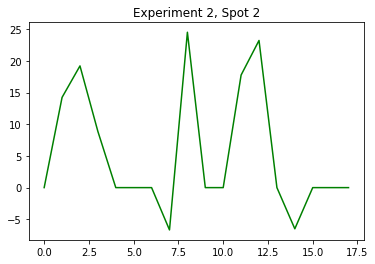

In [220]:

plt.plot(green_score, 'g-')
#plt.plot(blue, 'b-')
plt.title('Experiment 2, Spot 2')